In [1]:
import tensorflow as tf
import magenta as mg
import numpy as np
import sys

from magenta.common import tf_lib

In [2]:
RL_CODE_PATH = "/home/natasha/Developer/magenta_my_fork/magenta/magenta/models/rl_tutor"

In [3]:
sys.path.append(RL_CODE_PATH)
import rl_tuner
import rl_tutor_ops

In [7]:
# Place to save your model checkpoints and composi|
SAVE_PATH = "/home/natasha/Dropbox (MIT)/Google/RL-RNN-Project/rl-rnn-output/"
NOTE_RNN_PATH = RL_CODE_PATH + '/note_rnn.ckpt'

In [8]:
# Model parameter settings
ALGORITHM = 'psi'
REWARD_SCALER = 1
OUTPUT_EVERY_NTH = 10000
NUM_NOTES_IN_COMPOSITION = 32
PRIME_WITH_MIDI = False

In [9]:
rl_tuner_hparams = tf_lib.HParams(random_action_probability=0.1,
                                  store_every_nth=1,
                                  train_every_nth=5,
                                  minibatch_size=32,
                                  discount_rate=0.5,
                                  max_experience=100000,
                                  target_network_update_rate=0.01)

## Train network

In [10]:
reload(rl_tutor_ops)
reload(rl_tuner)
rl_tuner.reload_files()

In [11]:
rl_net = rl_tuner.RLTuner(SAVE_PATH, 
                          dqn_hparams=rl_tuner_hparams, 
                          algorithm=ALGORITHM,
                          reward_scaler=REWARD_SCALER,
                          output_every_nth=OUTPUT_EVERY_NTH,
                          note_rnn_checkpoint_dir=RL_CODE_PATH,
                          note_rnn_checkpoint_file=NOTE_RNN_PATH)

In child class RL Tuner
In parent class RL Tutor



Successfully initialized internal nets from checkpoint!


Generated sequence: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


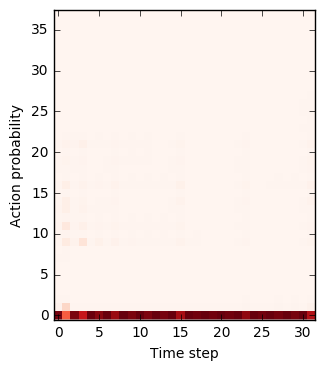

In [12]:
# Generate initial music sequence before training with RL
rl_net.generate_sample(visualize_probs=True, title='pre_rl', length=32)

In [ ]:
rl_net.train(num_steps=1000000, exploration_period=500000)

Evaluating initial model...
Evaluating model...
Training iteration 10000
	Reward for last 10000 steps: -55338.733802
		Domain reward: -4317.74102953
		Reward RNN reward: -51020.9927725
	Exploration probability is 0.9762382
Evaluating model...
Training iteration 20000
	Reward for last 10000 steps: -54371.8305053
		Domain reward: -3603.58914284
		Reward RNN reward: -50768.2413625
	Exploration probability is 0.9524782
Evaluating model...
Training iteration 30000
	Reward for last 10000 steps: -54156.2486318
		Domain reward: -3908.12619881
		Reward RNN reward: -50248.1224329
	Exploration probability is 0.9287182
Evaluating model...
Training iteration 40000
	Reward for last 10000 steps: -52831.2858605
		Domain reward: -2942.55675947
		Reward RNN reward: -49888.7291011
	Exploration probability is 0.9049582


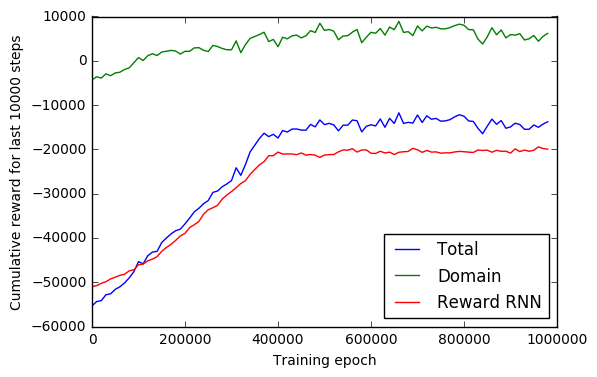

In [19]:
# Plot the rewards received during training. Improves as chance of random exploration action decreases.
rl_net.plot_rewards()

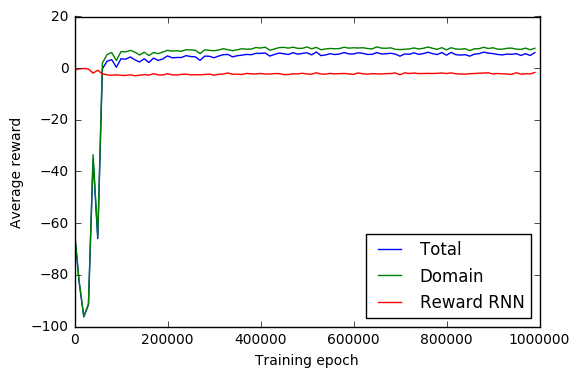

In [20]:
# Plot rewards received during calls to evaluation function throughout training. 
# Does not include exploration or random actions.
rl_net.plot_evaluation()

Generated sequence: [0, 0, 31, 0, 25, 0, 26, 0, 19, 0, 21, 30, 26, 0, 26, 0, 0, 19, 23, 26, 0, 0, 1, 28, 0, 23, 25, 0, 28, 0, 0, 1]


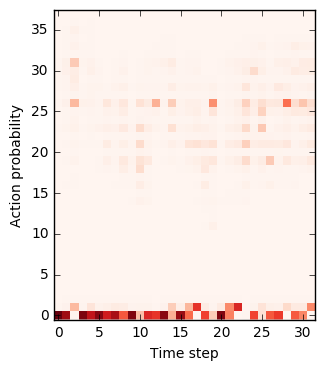

In [26]:
rl_net.generate_sample(visualize_probs=True, title='psi')

In [ ]:
# If you're happy with the model, save a version!
rl_net.save_model('check_model', directory=SAVE_PATH)

In [22]:
# Compute statistics about how well the model adheres to the music theory rules.
stat_dict = rl_net.evaluate_domain_metrics(num_compositions=1000)

Total compositions: 1000.0
Total notes:32000.0
	Compositions starting with tonic: 32.0
	Compositions with unique highest note:739.0
	Compositions with unique lowest note:724.0
	Number of resolved leaps:378.0
	Number of double leaps:175.0
	Notes not in key:670.0
	Notes in motif:20727.0
	Notes in repeated motif:1.0
	Notes excessively repeated:0.0

	Percent compositions starting with tonic:0.032
	Percent compositions with unique highest note:0.739
	Percent compositions with unique lowest note:0.724
	Percent of leaps resolved:0.683544303797
	Percent notes not in key:0.0209375
	Percent notes in motif:0.64771875
	Percent notes in repeated motif:3.125e-05
	Percent notes excessively repeated:0.0

	Average autocorrelation of lag1:-0.286063065673
	Average autocorrelation of lag2:0.0510668239454
	Average autocorrelation of lag3:-0.0194177204146

	Avg. num octave jumps per composition:0.022
	Avg. num sevenths per composition:0.021
	Avg. num fifths per composition:0.348
	Avg. num sixths per composi